In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv("hr_job.csv")

In [3]:
data.sample(10)

ID  city  city_development_index  gender  relevent_experience  \
14823  14824    16                0.910000       1                    1   
5735    5736    21                0.864631       1                    0   
10274  10275   114                0.916780       1                    1   
12918  12919    11                0.550000       1                    0   
2853    2854   103                0.845561       1                    0   
502      503    21                0.624000       1                    1   
5982    5983   136                0.897000       1                    1   
12975  12976   103                0.920000       1                    1   
16714  16715   103                0.920000       0                    0   
10660  10661    21                0.624000       0                    1   

       enrolled_university  education_level  major_discipline  experience  \
14823                  0.0              3.0               4.0        12.0   
5735                   2.0              3.0               4.0         4.0   
10274                  0.0              3.0               4.0         5.0   
12918                  2.0              2.0               NaN         3.0   
2853                   0.0              3.0               4.0        25.0   
502                    0.0              3.0               4.0         8.0   
5982                   0.0              4.0               4.0        14.0   
12975                  0.0              3.0               4.0         4.0   
16714                  2.0              4.0               4.0        25.0   
10660                  0.0              3.0               4.0         3.0   

       company_size  company_type  last_new_job  training_hours  target  
14823           1.0           4.0           5.0       64.000000       1  
5735            NaN           NaN           1.0        8.512880       1  
10274           NaN           NaN           1.0       80.454242       1  
12918           NaN           NaN           0.0       19.000000       0  
2853            NaN           4.0           1.0       46.673766       1  
502             2.0           4.0           0.0       53.293766       1  
5982            4.0           4.0           1.0       83.000000       0  
12975           3.0           4.0           1.0       66.000000       0  
16714           4.0           3.0           2.0       48.000000       0  
10660           5.0           4.0           1.0       36.000000       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17257 entries, 0 to 17256
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17257 non-null  int64  
 1   city                    17257 non-null  int64  
 2   city_development_index  17257 non-null  float64
 3   gender                  17257 non-null  int64  
 4   relevent_experience     17257 non-null  int64  
 5   enrolled_university     17006 non-null  float64
 6   education_level         16962 non-null  float64
 7   major_discipline        15441 non-null  float64
 8   experience              17161 non-null  float64
 9   company_size            9603 non-null   float64
 10  company_type            9982 non-null   float64
 11  last_new_job            16928 non-null  float64
 12  training_hours          17257 non-null  float64
 13  target                  17257 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 

In [5]:
data.describe()

ID          city  city_development_index        gender  \
count  17257.000000  17257.000000            17257.000000  17257.000000   
mean    8629.000000     72.991887                0.805103      0.828417   
std     4981.811133     46.128232                0.128002      0.488328   
min        1.000000      1.000000                0.448000      0.000000   
25%     4315.000000     21.000000                0.680000      1.000000   
50%     8629.000000     83.000000                0.874349      1.000000   
75%    12943.000000    103.000000                0.920000      1.000000   
max    17257.000000    180.000000                0.949000      2.000000   

       relevent_experience  enrolled_university  education_level  \
count         17257.000000         17006.000000     16962.000000   
mean              0.710726             0.476891         3.108183   
std               0.453438             0.825014         0.582475   
min               0.000000             0.000000         1.000000   
25%               0.000000             0.000000         3.000000   
50%               1.000000             0.000000         3.000000   
75%               1.000000             1.000000         3.000000   
max               1.000000             2.000000         5.000000   

       major_discipline    experience  company_size  company_type  \
count      15441.000000  17161.000000   9603.000000   9982.000000   
mean           3.888543     10.532370      4.259711      3.775496   
std            0.581960      8.291935      2.187910      0.848857   
min            0.000000      0.000000      1.000000      0.000000   
25%            4.000000      4.000000      3.000000      4.000000   
50%            4.000000      8.000000      4.000000      4.000000   
75%            4.000000     15.000000      6.000000      4.000000   
max            5.000000     25.000000      8.000000      5.000000   

       last_new_job  training_hours        target  
count  16928.000000    17257.000000  17257.000000  
mean       1.794542       63.974366      0.499971  
std        1.582556       57.102777      0.500014  
min        0.000000        1.000000      0.000000  
25%        1.000000       24.000000      0.000000  
50%        1.000000       46.669853      0.000000  
75%        2.000000       85.425166      1.000000  
max        5.000000      336.000000      1.000000

<AxesSubplot:>

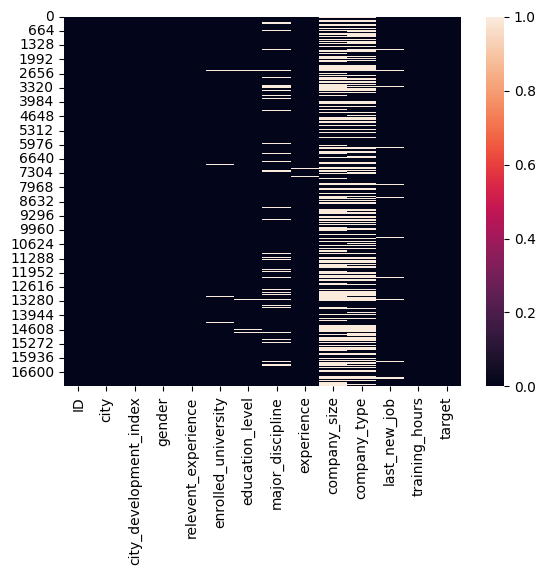

In [6]:
sns.heatmap(data.isnull())

In [7]:
for col in data.columns:
    percent = (data[col].isnull().sum()*100)/len(data) # instead of len(data) you can also use data.shape[0]
    if percent>30:
        print(f"{col} contains {percent}% empty values")

company_size contains 44.35301616735238% empty values
company_type contains 42.156805933823954% empty values


In [8]:
data.drop(["company_size","company_type","ID"],axis=1,inplace=True)

In [9]:
data.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        251
education_level            295
major_discipline          1816
experience                  96
last_new_job               329
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

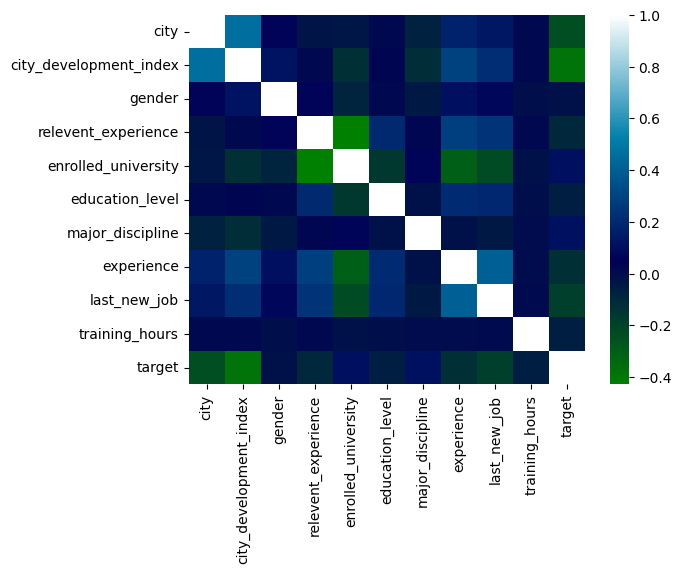

In [10]:
sns.heatmap(data.corr(),cmap="ocean")

In [11]:
check_feature_relation = ["experience","training_hours","last_new_job","city_development_index","enrolled_university"]

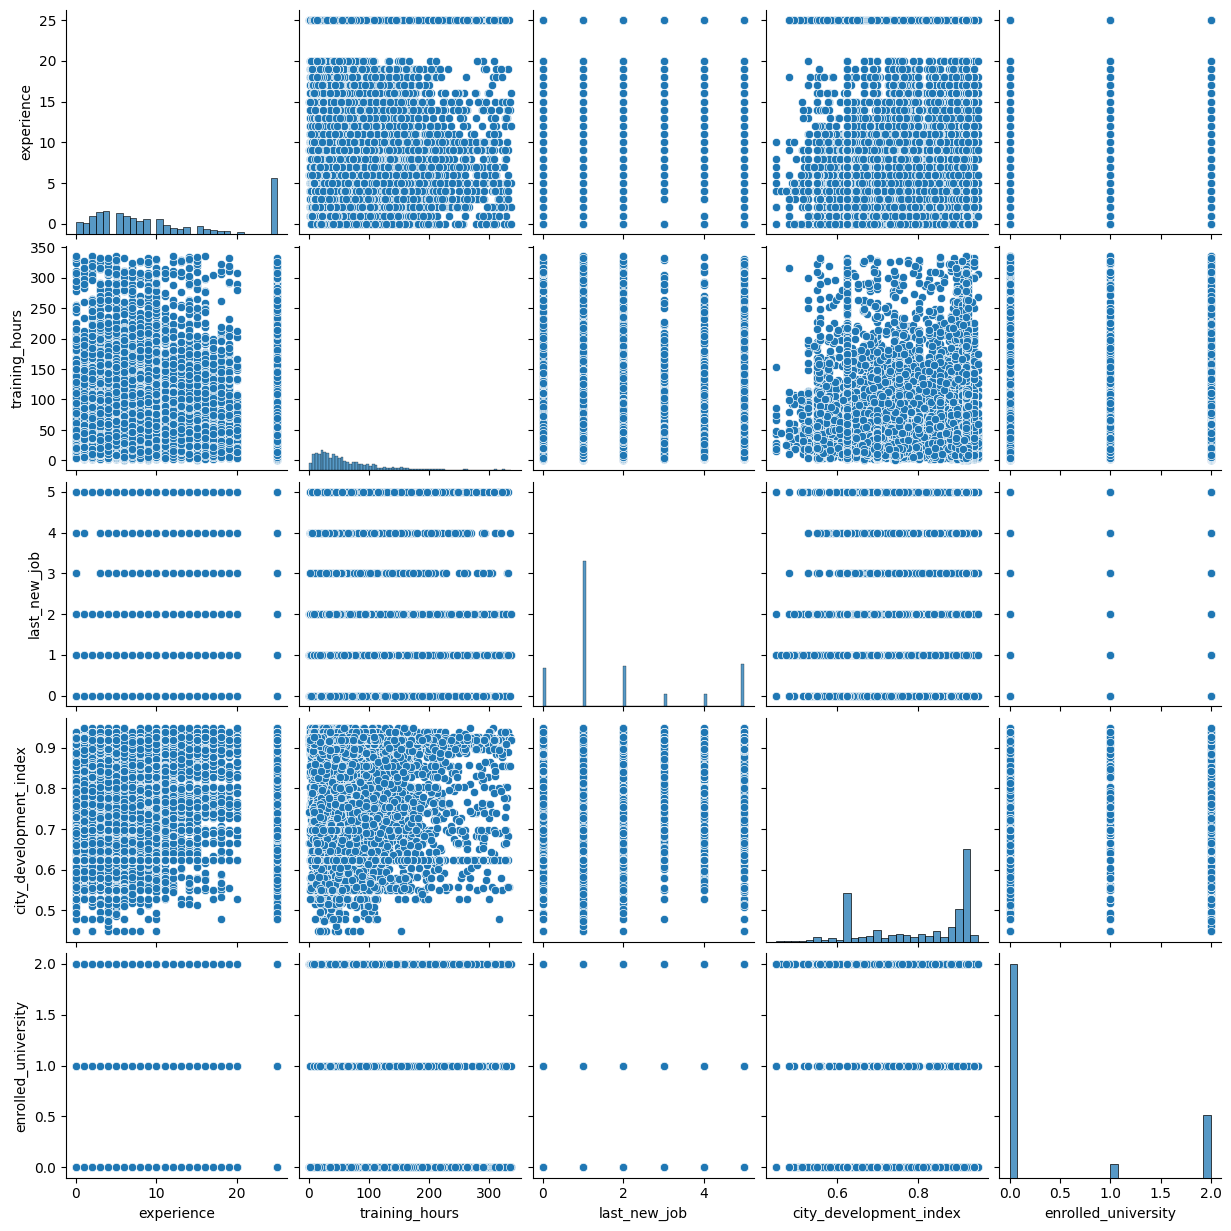

In [12]:
sns.pairplot(data[check_feature_relation])

In [13]:
fig = ex.histogram(data,marginal="box",x="training_hours",color="target")
fig.update_layout(bargap=0.2)

In [14]:
data.education_level.fillna(3.0,inplace=True)

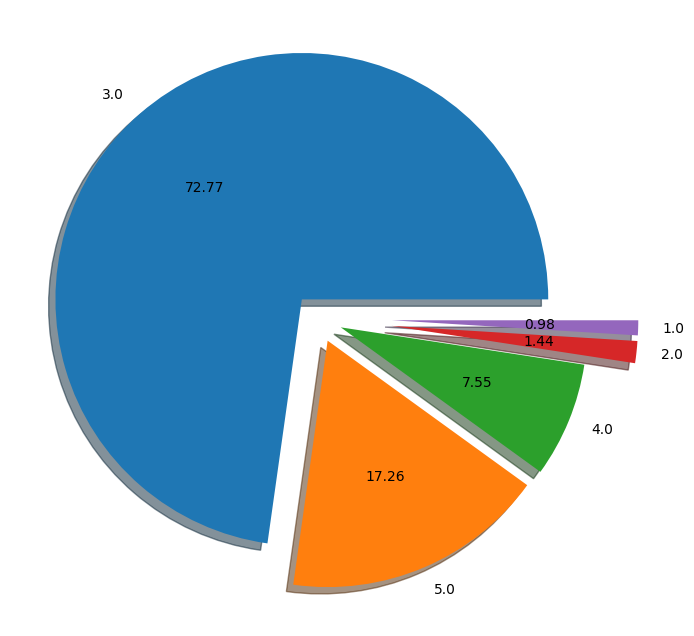

In [15]:
plt.figure(figsize=(15,8))
plt.pie(data['education_level'].value_counts(),labels=data['education_level'].unique(),shadow=True,autopct="%.2f",explode=[0.1,0.1,0.1,0.3,0.3])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

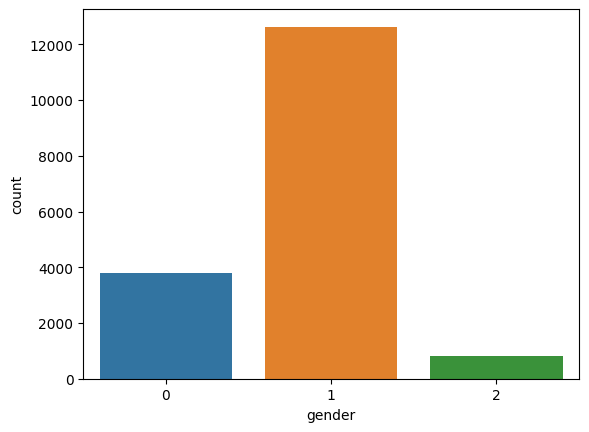

In [16]:
sns.countplot(data=data,x="gender")

In [17]:
data['relevent_experience'].unique()

array([0, 1])

<AxesSubplot:xlabel='target', ylabel='count'>

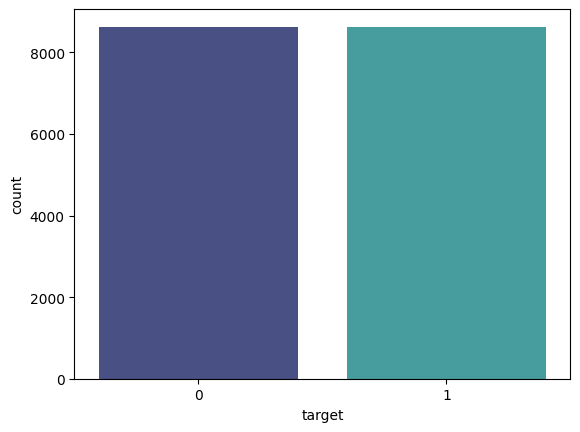

In [18]:
sns.countplot(data=data,x="target",palette="mako")

In [19]:
fig = ex.histogram(data,marginal="box",x="city_development_index",color="target")
fig.update_layout(bargap=0.2)

In [20]:
from sklearn.tree import plot_tree,DecisionTreeClassifier

In [21]:
feature_selection = ["experience","training_hours","last_new_job","city","relevent_experience"]

In [22]:
X = data[feature_selection]
X_copy = X.copy()
Y = data.target
Y_copy = Y.copy()

In [23]:
X.fillna(method="ffill",inplace=True)

/tmp/ipykernel_108865/254466950.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
model = DecisionTreeClassifier(max_depth=15,max_features=5,splitter="best",criterion="gini")
model = model.fit(x_train,y_train)

In [27]:
class_names = ['0','1']

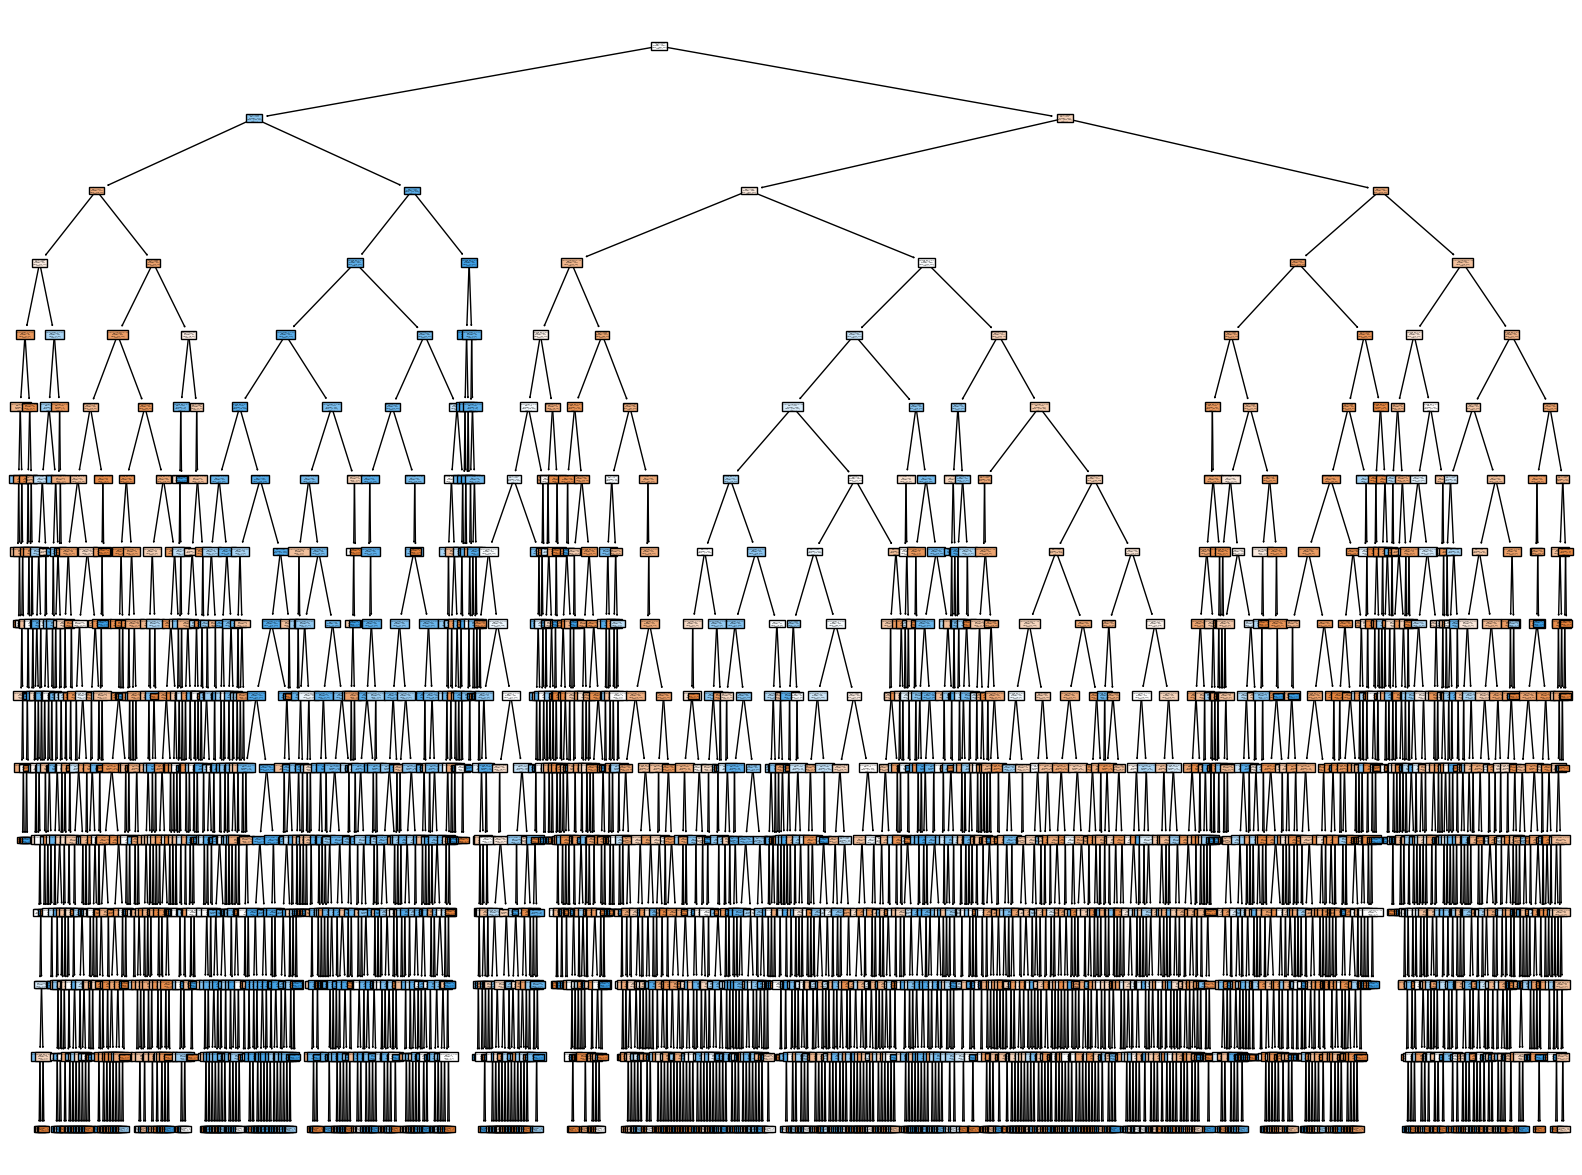

In [28]:
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names=X_copy.columns,
          class_names=class_names,
          filled=True)
plt.show()

In [29]:
model.feature_importances_

array([0.13935908, 0.29687836, 0.07732958, 0.45526323, 0.03116974])

In [30]:
feat_importance_df = pd.DataFrame({
    'features': X_copy.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [31]:
feat_importance_df

features  importance
3                 city    0.455263
1       training_hours    0.296878
0           experience    0.139359
2         last_new_job    0.077330
4  relevent_experience    0.031170

In [32]:
from sklearn import tree

explore_decision_tree = tree.export_text(model)
print(explore_decision_tree)

|--- feature_3 <= 0.12
|   |--- feature_3 <= 0.11
|   |   |--- feature_3 <= 0.06
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.20
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  0.20
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |  

In [33]:
import graphviz
# DOT data
graph = tree.export_graphviz(model)

# Draw graph
graph_plot = graphviz.Source(graph, format="png") 
graph_plot

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
model.classes_

In [ ]:
model.n_features_

In [ ]:
predict = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
We are 

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
accuracy = accuracy_score(y_true=y_test,y_pred=predict)

In [ ]:
accuracy

In [ ]:
f1_score(predict,y_test)

In [ ]:
precision_score(y_true=y_test,y_pred=predict)

In [ ]:
recall_score(y_true=y_test,y_pred=predict)

In [ ]:
sns.heatmap(confusion_matrix(y_pred=predict,y_true=y_test),annot=True)